David Lattimer  
1/23/2021  
DSC 550  
# Titanic Case Study Part 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates
import numpy as np

In [3]:
#Load the data from the “train.csv” file into a DataFrame
df = pd.read_csv('train.csv')

In [4]:
#Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with)
print('The dimensions of the table are: ' + str(df.shape))

The dimensions of the table are: (891, 12)


In [5]:
#Display the first 5 rows of data so you can see the column headings and the type of data for each column.
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Widener, Mr. Harry Elkins",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


C:\Users\David\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\David\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


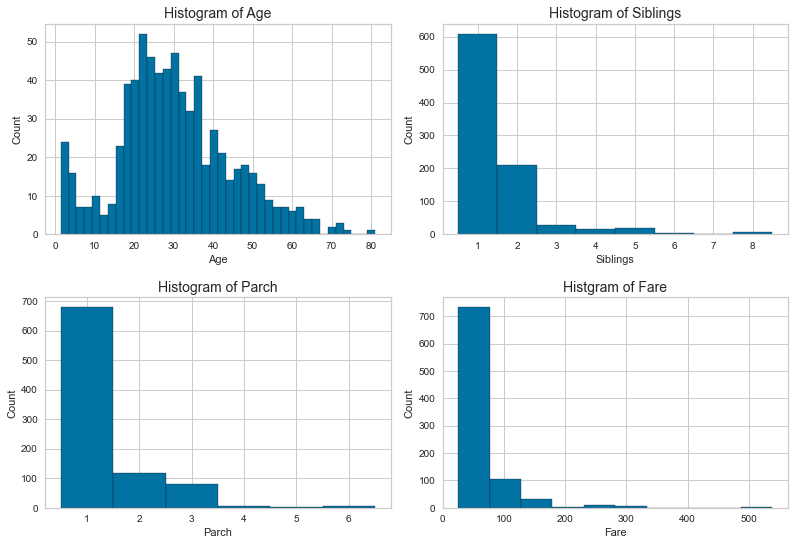

In [8]:
#Set up size of entire subplots
plt.figure(figsize=(12,8))

#Set up age histogram
plt.subplot(221)
plt.hist(df.Age, bins=40, align='right', edgecolor='k')
plt.title('Histogram of Age', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age')

#Set up Sibling histogram
plt.subplot(222)
plt.hist(df.SibSp, bins=8, align='right', edgecolor='k')
plt.title('Histogram of Siblings', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Siblings')

#Set up Parch Histogram
plt.subplot(223)
plt.hist(df.Parch, bins=6, align='right', edgecolor='k')
plt.title('Histogram of Parch', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Parch')

#Set up Fare Histogram
plt.subplot(224)
plt.hist(df.Fare, bins=10, align='right', edgecolor='k')
plt.title('Histgram of Fare', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Fare')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.09, right=0.95, hspace=0.3,
                    wspace=0.15)
plt.show()

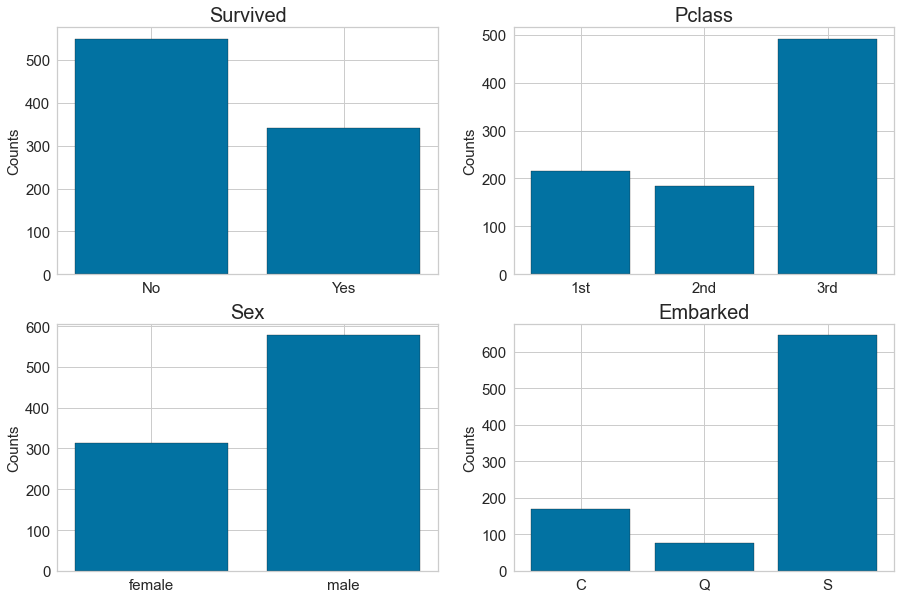

In [8]:
plt.figure(figsize=(15,10))

#Change the survival from 1 and 0 to Yes and No
X_Survived = df.replace({'Survived': {1: 'Yes', 0: 'No'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = df.replace({'Survived': {1: 'Yes', 0: 'No'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

#Make the bar chart
plt.subplot(221)
plt.bar(X_Survived, Y_Survived, edgecolor='k')
plt.title('Survived', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.tick_params(axis='both', labelsize=15)


#Change the class from 1-3 to 1st-3rd
X_Pclass = df.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = df.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

#Make the bar chart
plt.subplot(222)
plt.bar(X_Pclass, Y_Pclass, edgecolor='k')
plt.title('Pclass', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.tick_params(axis='both', labelsize=15)


#Set the bars based on outcomes and counts
x_sex = df.groupby('Sex').size().reset_index(name='Counts')['Sex']
y_sex = df.groupby('Sex').size().reset_index(name='Counts')['Counts']

#Graph the bar chart
plt.subplot(223)
plt.bar(x_sex, y_sex, edgecolor='k')
plt.title('Sex', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.tick_params(axis='both', labelsize=15)


#Set the embarked groups
x_embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
y_embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Counts']

#Graph the embarked bar chart
plt.subplot(224)
plt.bar(x_embarked, y_embarked, edgecolor='k')
plt.title('Embarked', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.tick_params(axis='both', labelsize=15)


plt.show()

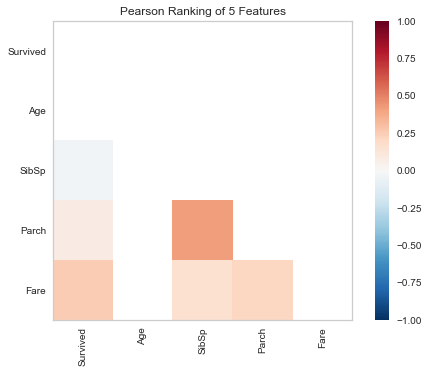

In [9]:
testing = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']
x = df[testing].to_numpy()

visualizer = Rank2D(features=testing, algorithm='pearson')
visualizer.fit(x)
visualizer.transform(x)
visualizer.show() 

In [10]:



set_palette('sns_bright')
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

In [11]:
df_norm = df.copy()
for feature in num_features:
    df_norm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))

    

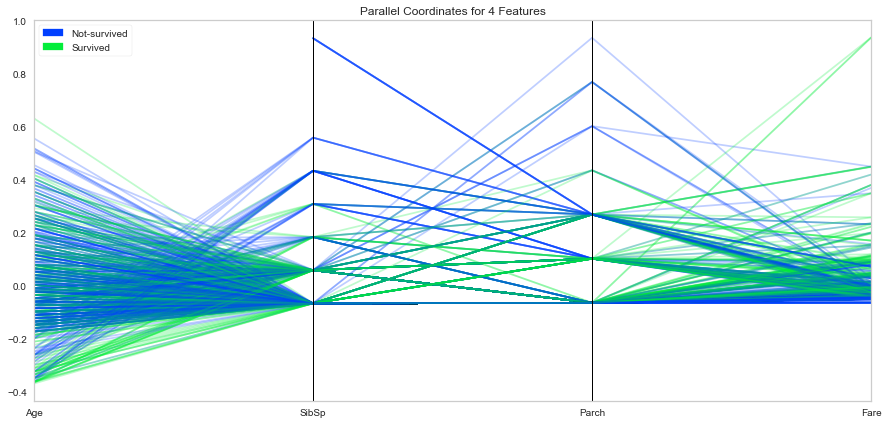

In [12]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50
X = df_norm[num_features].to_numpy()
y = df.Survived.to_numpy()

visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.show()
plt.show()


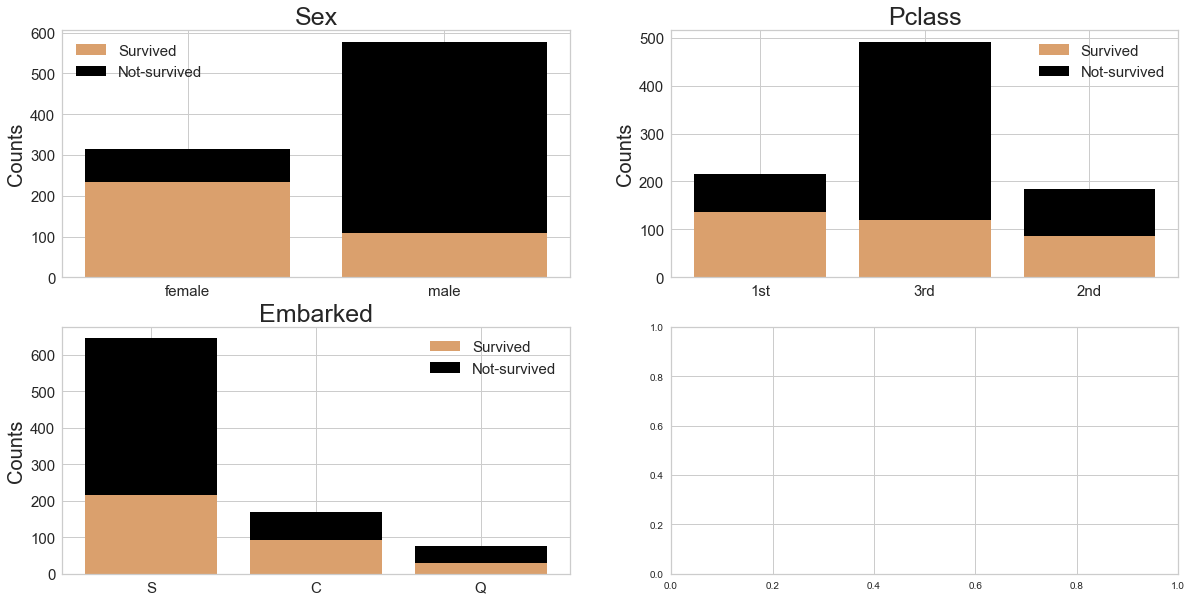

In [15]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
plt.rcParams['figure.figsize'] = (20, 15)

#Sex and survival plot:


# make the data read to feed into the visulizer
Sex_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==1]['Sex'].value_counts()
Sex_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)

p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values, color='#DAA06D')
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values, color='#000000')
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)


# make the data read to feed into the visualizer
Pclass_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[df['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[df['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values, color='#DAA06D')
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values, color='#000000')
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)



# make the data read to feed into the visualizer
Embarked_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values, color='#DAA06D')
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values, color='#000000')
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
plt.show()

In [14]:
#Sorry, I just had to take the chance to make the colors of our stacks the colors of the Titanic smokestacks. Only
#Feels right when making a stacked bar graph. Also the default colors were... harsh.